## Transforming COVID-19 Data with Pandas & Visualizing with Seaborn

This project demonstrates loading a CSV into a Pandas DF, manipulating the resultant DF and then visualizing the DF in Seaborn

In [23]:
#Import
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
#data used to be at a .CSV URL... now you need to click download on this webpage: https://covidtracking.com/data/national

#get data and put into pandas data frame
csv = '/Users/charlieevert/Downloads/national-history.csv'

#creates df from csv
df = pd.read_csv(csv)

df   


,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease
0,3/7/21,515151.0,842,45475.0,8134.0,726,40199.0,776361.0,74582825.0,131835,4281.0,2802.0,28756489.0,41835,56,363825123,1170059
1,3/6/21,514309.0,1680,45453.0,8409.0,503,41401.0,775635.0,74450990.0,143835,4280.0,2811.0,28714654.0,60015,56,362655064,1430992
2,3/5/21,512629.0,2221,45373.0,8634.0,2781,42541.0,775132.0,74307155.0,271917,4275.0,2889.0,28654639.0,68787,56,361224072,1744417
3,3/4/21,510408.0,1743,45293.0,8970.0,1530,44172.0,772351.0,74035238.0,177957,4267.0,2973.0,28585852.0,65487,56,359479655,1590984
4,3/3/21,508665.0,2449,45214.0,9359.0,2172,45462.0,770821.0,73857281.0,267001,4260.0,3094.0,28520365.0,66836,56,357888671,1406795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,1/17/20,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0
416,1/16/20,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0
417,1/15/20,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0
418,1/14/20,NaN,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0


In [25]:
# convert date to date format
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

# convert non-missing postitive and negative from float to int
df.death = df.death.fillna(0.0).astype(int) # works because I added the 'death' field in the df
 
df 

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease
0,2021-03-07,515151,842,45475.0,8134.0,726,40199.0,776361.0,74582825.0,131835,4281.0,2802.0,28756489.0,41835,56,363825123,1170059
1,2021-03-06,514309,1680,45453.0,8409.0,503,41401.0,775635.0,74450990.0,143835,4280.0,2811.0,28714654.0,60015,56,362655064,1430992
2,2021-03-05,512629,2221,45373.0,8634.0,2781,42541.0,775132.0,74307155.0,271917,4275.0,2889.0,28654639.0,68787,56,361224072,1744417
3,2021-03-04,510408,1743,45293.0,8970.0,1530,44172.0,772351.0,74035238.0,177957,4267.0,2973.0,28585852.0,65487,56,359479655,1590984
4,2021-03-03,508665,2449,45214.0,9359.0,2172,45462.0,770821.0,73857281.0,267001,4260.0,3094.0,28520365.0,66836,56,357888671,1406795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,2020-01-17,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0
416,2020-01-16,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0
417,2020-01-15,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0
418,2020-01-14,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0


In [26]:
#Filter dataframe to just the 3/7/21
df_current = df.loc[df['date']=="2021-03-07"]

df_current


,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease
0,2021-03-07,515151,842,45475.0,8134.0,726,40199.0,776361.0,74582825.0,131835,4281.0,2802.0,28756489.0,41835,56,363825123,1170059


In [27]:
df_death = df_current.sort_values(by = 'death',ascending=False) #sorts df by deaths in descending order

# Show output of new dataframe
df_death

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease
0,2021-03-07,515151,842,45475.0,8134.0,726,40199.0,776361.0,74582825.0,131835,4281.0,2802.0,28756489.0,41835,56,363825123,1170059


In [19]:
#Create new df
df_topdeaths = df.copy(deep=True) #copy the df

df_topdeaths.iloc[0:10]

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease
0,2021-03-07,515151,842,45475.0,8134.0,726,40199.0,776361.0,74582825.0,131835,4281.0,2802.0,28756489.0,41835,56,363825123,1170059
1,2021-03-06,514309,1680,45453.0,8409.0,503,41401.0,775635.0,74450990.0,143835,4280.0,2811.0,28714654.0,60015,56,362655064,1430992
2,2021-03-05,512629,2221,45373.0,8634.0,2781,42541.0,775132.0,74307155.0,271917,4275.0,2889.0,28654639.0,68787,56,361224072,1744417
3,2021-03-04,510408,1743,45293.0,8970.0,1530,44172.0,772351.0,74035238.0,177957,4267.0,2973.0,28585852.0,65487,56,359479655,1590984
4,2021-03-03,508665,2449,45214.0,9359.0,2172,45462.0,770821.0,73857281.0,267001,4260.0,3094.0,28520365.0,66836,56,357888671,1406795
5,2021-03-02,506216,1728,45084.0,9465.0,1871,46388.0,768649.0,73590280.0,255779,4257.0,3169.0,28453529.0,54248,56,356481876,1343519
6,2021-03-01,504488,1241,44956.0,9595.0,1024,46738.0,766778.0,73334501.0,118077,4252.0,3171.0,28399281.0,48092,56,355138357,1154440
7,2021-02-28,503247,1051,44907.0,9802.0,879,47352.0,765754.0,73216424.0,203599,4252.0,3245.0,28351189.0,54349,56,353983917,1408422
8,2021-02-27,502196,1847,44875.0,10114.0,1428,48871.0,764875.0,73012825.0,205090,4252.0,3335.0,28296840.0,71245,56,352575495,1655179
9,2021-02-26,500349,2141,44791.0,10466.0,1868,51112.0,763447.0,72807735.0,276829,4247.0,3466.0,28225595.0,74857,56,350920316,1803309


In [28]:
#Add ranks
df_topdeaths['rank'] = df['death'].rank(ascending = 0) #adds rank column to df_topdeaths


df_topdeaths

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease,rank
0,2021-03-07,515151,842,45475.0,8134.0,726,40199.0,776361.0,74582825.0,131835,4281.0,2802.0,28756489.0,41835,56,363825123,1170059,1.0
1,2021-03-06,514309,1680,45453.0,8409.0,503,41401.0,775635.0,74450990.0,143835,4280.0,2811.0,28714654.0,60015,56,362655064,1430992,2.0
2,2021-03-05,512629,2221,45373.0,8634.0,2781,42541.0,775132.0,74307155.0,271917,4275.0,2889.0,28654639.0,68787,56,361224072,1744417,3.0
3,2021-03-04,510408,1743,45293.0,8970.0,1530,44172.0,772351.0,74035238.0,177957,4267.0,2973.0,28585852.0,65487,56,359479655,1590984,4.0
4,2021-03-03,508665,2449,45214.0,9359.0,2172,45462.0,770821.0,73857281.0,267001,4260.0,3094.0,28520365.0,66836,56,357888671,1406795,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,2020-01-17,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0,398.5
416,2020-01-16,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0,398.5
417,2020-01-15,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0,398.5
418,2020-01-14,0,0,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,0.0,0,1,0,0,398.5


(array([18322., 18383., 18444., 18506., 18567., 18628., 18687.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

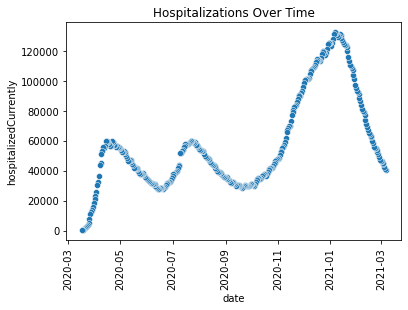

In [32]:
#bar chart showing Covid deaths by state
ax = sns.scatterplot(x="date", y="hospitalizedCurrently", data=df).set(title="Hospitalizations Over Time") #shows requested bar chart on current date, but title is hardcoded
plt.xticks(rotation=90)